### ***Importing Libraries***

In [2]:
import pandas as pd
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt

### ***Reading Parquet File Format***

In [3]:
df = pd.read_parquet(r"C:\Users\kanis\Downloads\amex_offers_data.parquet")

### ***Naming Columns***

In [4]:
df.columns = [
    "customer_id",
    "offer_id",
    "event_timestamp",
    "event_date",
    "offer_action",
    
    "interest_carrental",
    "interest_coffee",
    "interest_shipping_b2b",
    "interest_photography_hobby",
    "interest_warehouse_b2b",
    "interest_construction_b2b",
    "interest_furnishing_furniture",
    "interest_restaurant_non_qsr",
    "interest_airlines",
    "interest_professional_service_b2b",
    "interest_electronics",
    "interest_homeimprovement_hobby",
    
    "login_channel_count_30d",
    "emails_sent_30d",
    "emails_clicked_30d",
    "emails_opted_out_30d",
    
    "spend_lifestyle_3mo",
    "spend_electronics_3mo",
    "spend_restaurant_3mo",
    
    "debit_airline_30d",
    "debit_entertainment_30d",
    "debit_financial_30d",
    "debit_oil_gas_30d",
    "debit_lodging_30d",
    "debit_restaurant_30d",
    "debit_retail_30d",
    "debit_travel_transport_rental_30d",
    "debit_utilities_30d",
    "debit_communication_30d",
    "debit_everything_else_30d",
    
    "offer_clicked_3d_flag",
    "min_spend_for_offer",
    "merchant_offer_discount_rate",
    "merchant_offer_discount_value",
    "membership_reward_points",
    "reward_points_per_dollar",
    "discount_per_dollar",
    
    "offer_duration_diff",
    "rolling_clicks_30d",
    "rolling_impressions_30d",
    "ctr_same_merchant_30d",
    "avg_offer_ctr",
    "impressions_offer_3d",
    
    "offer_category_business",
    "offer_category_dining",
    "offer_category_entertainment",
    "offer_category_retail",
    "offer_category_services",
    "offer_category_shopping",
    "offer_category_travel"
]


### ***Handling Null Values***

In [5]:
df.replace(["", "NULL", "N/A", "nan","na", "None"], pd.NA, inplace=True)

### ***Handling Booleans***

In [6]:
df = df.replace({"True": 1, "False": 0})

In [7]:
bool_cols = ["offer_action",
            "offer_category_business",
    "offer_category_dining",
    "offer_category_entertainment",
    "offer_category_retail",
    "offer_category_services",
    "offer_category_shopping",
    "offer_category_travel"]

for col in bool_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    df[col] = df[col].astype('Int64')  

### ***Handling Datatypes***

In [8]:
columns = ["customer_id",
    "offer_id",
    "offer_action",
    
    "interest_carrental",
    "interest_coffee",
    "interest_shipping_b2b",
    "interest_photography_hobby",
    "interest_warehouse_b2b",
    "interest_construction_b2b",
    "interest_furnishing_furniture",
    "interest_restaurant_non_qsr",
    "interest_airlines",
    "interest_professional_service_b2b",
    "interest_electronics",
    "interest_homeimprovement_hobby",
    
    "login_channel_count_30d",
    "emails_sent_30d",
    "emails_clicked_30d",
    "emails_opted_out_30d",
    
    "spend_lifestyle_3mo",
    "spend_electronics_3mo",
    "spend_restaurant_3mo",
    
    "debit_airline_30d",
    "debit_entertainment_30d",
    "debit_financial_30d",
    "debit_oil_gas_30d",
    "debit_lodging_30d",
    "debit_restaurant_30d",
    "debit_retail_30d",
    "debit_travel_transport_rental_30d",
    "debit_utilities_30d",
    "debit_communication_30d",
    "debit_everything_else_30d",
    
    "offer_clicked_3d_flag",
    "min_spend_for_offer",
    "merchant_offer_discount_rate",
    "merchant_offer_discount_value",
    "membership_reward_points",
    "reward_points_per_dollar",
    "discount_per_dollar",
    
    "offer_duration_diff",
    "rolling_clicks_30d",
    "rolling_impressions_30d",
    "ctr_same_merchant_30d",
    "avg_offer_ctr",
    "impressions_offer_3d",
    ]

In [9]:
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### ***Handling Date Columns***

In [10]:
def safe_parse(x):
    try:
        return parser.parse(x, dayfirst=True)
    except Exception:
        return x  


df['event_date'] = df['event_date'].apply(safe_parse)

In [11]:
df.drop(columns="event_timestamp", inplace = True)

### ***Handling Duplicates***

In [12]:
df = df.drop_duplicates()

### ***Handling Negative Values***

#### No need to make spend columns positive in order to retain true spending behaviour of a customer.

In [13]:
for col in columns:
    print(f"No. of negatives in {col}")
    print(df[df[col]<0][col].count())
    print()

No. of negatives in customer_id
0

No. of negatives in offer_id
0

No. of negatives in offer_action
0

No. of negatives in interest_carrental
0

No. of negatives in interest_coffee
0

No. of negatives in interest_shipping_b2b
0

No. of negatives in interest_photography_hobby
0

No. of negatives in interest_warehouse_b2b
0

No. of negatives in interest_construction_b2b
0

No. of negatives in interest_furnishing_furniture
0

No. of negatives in interest_restaurant_non_qsr
0

No. of negatives in interest_airlines
0

No. of negatives in interest_professional_service_b2b
0

No. of negatives in interest_electronics
0

No. of negatives in interest_homeimprovement_hobby
0

No. of negatives in login_channel_count_30d
0

No. of negatives in emails_sent_30d
0

No. of negatives in emails_clicked_30d
0

No. of negatives in emails_opted_out_30d
0

No. of negatives in spend_lifestyle_3mo
31572

No. of negatives in spend_electronics_3mo
3480

No. of negatives in spend_restaurant_3mo
2091

No. of negat

In [14]:
df["reward_points_per_dollar"] = df["reward_points_per_dollar"].apply(np.abs)

### ***Saving Cleaned Data***

In [15]:
df.to_csv("customers_offers_data.csv", index=False)

### ***EDA***

In [17]:
df.head()

,customer_id,offer_id,event_date,offer_action,interest_carrental,interest_coffee,interest_shipping_b2b,interest_photography_hobby,interest_warehouse_b2b,interest_construction_b2b,...,ctr_same_merchant_30d,avg_offer_ctr,impressions_offer_3d,offer_category_business,offer_category_dining,offer_category_entertainment,offer_category_retail,offer_category_services,offer_category_shopping,offer_category_travel
0,1010494,601711,2023-01-11,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089583,0.083204,2151.0,0,0,0,0,0,1,0
1,1010494,33452,2023-09-11,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111752,0.181776,1668.0,0,0,0,0,0,1,0
2,1010494,88456737,2023-01-11,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.088514,NaN,NaN,0,0,0,0,0,1,0
3,1010494,390981,2023-01-11,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.086931,0.059246,3678.0,0,0,0,0,0,1,0
4,1010494,7114,2023-09-11,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089497,0.124221,3619.0,0,0,0,0,0,1,0


### Question 1 : Using the Data Provided, validate the following statements: ( Note : Active User of Amex Portal for a provided timeframe are people who have visited the Amex Portal at least once in the past 30 days from any given date within the provided timeframe)




#### 1. Active Users of Amex Portal are more likely to choose Airline Offers than another offer category

In [15]:
df.shape[0]

1768311

In [16]:
df_active = df[df['login_channel_count_30d'] >= 1]
df_active.shape[0]

1194240

In [17]:
df_chose_offer = df_active[df_active["offer_action"]==1]
df_chose_offer.shape[0]

80821

In [18]:
offer_categories = ['offer_category_business', 'offer_category_dining',
                    'offer_category_entertainment', 'offer_category_retail',
                    'offer_category_services', 'offer_category_shopping',
                    'offer_category_travel']

In [19]:
offer_cat_dict = {}
for offer in offer_categories:
        count = df_chose_offer[df_chose_offer[offer] == 1]
        offer_cat_dict[offer] = count.shape[0]
offer_cat_dict

{'offer_category_business': 0,
 'offer_category_dining': 3973,
 'offer_category_entertainment': 3454,
 'offer_category_retail': 0,
 'offer_category_services': 4555,
 'offer_category_shopping': 64976,
 'offer_category_travel': 5750}

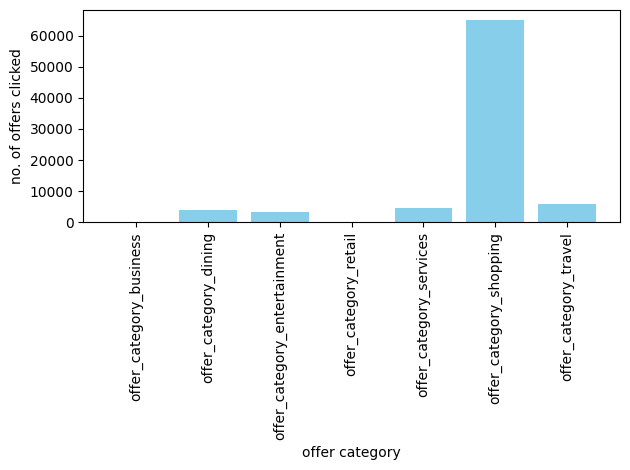

In [20]:
# cat VS no. of customers
plt.bar(offer_cat_dict.keys(), offer_cat_dict.values(), color='skyblue')
plt.xlabel('offer category')
plt.ylabel('no. of offers clicked')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

- Based on user behavior, only 7.1% (5,750 / 80,821) of active users who chose offers selected travel (airline) offers, whereas over 80% selected shopping offers.
Hence, airline offers are significantly less preferred compared to shopping, services, dining, or entertainment categories among active Amex Portal users.

#### 2. Active Users of Amex Portal are generally able to save more money from Discounts than other users.


In [21]:
df["type_of_cust"] = df['login_channel_count_30d'].apply(lambda x: 'active' if pd.notna(x) and x >= 1 else 'inactive')

In [22]:
df['total_spend_3mo'] = df[['spend_lifestyle_3mo', 'spend_electronics_3mo', 'spend_restaurant_3mo']].sum(axis=1)

In [23]:
df["saved_money"] = df["total_spend_3mo"]*df["discount_per_dollar"]

In [24]:
df["saved_money"].value_counts()

saved_money
0.000000      131879
27.000000        788
113.408000       657
296.960000       597
16.572000        556
               ...  
169.646400         1
230.811429         1
326.243077         1
151.470000         1
141.608013         1
Name: count, Length: 193736, dtype: int64

In [25]:
df.groupby(df["type_of_cust"])["saved_money"].mean()

type_of_cust
active      783.774133
inactive    414.820797
Name: saved_money, dtype: float64

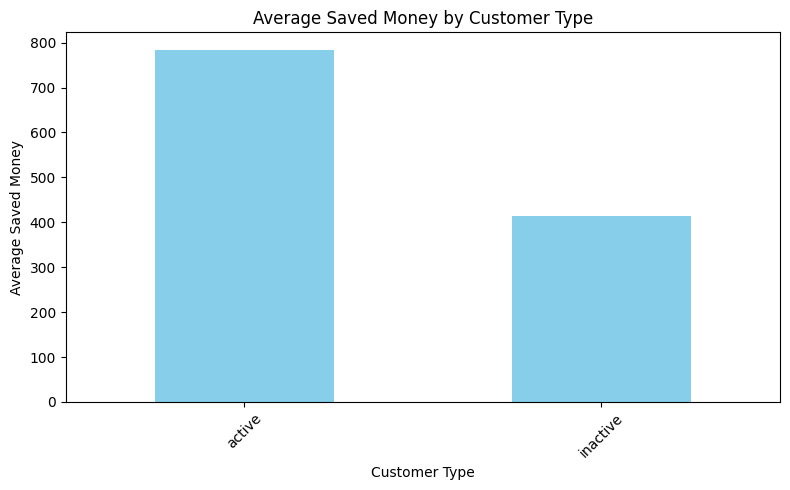

In [26]:
avg_savings = df.groupby('type_of_cust')['saved_money'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_savings.plot(kind='bar', color='skyblue')

plt.title('Average Saved Money by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Saved Money')
plt.xticks(rotation=45)  
plt.tight_layout()       

plt.show()



#### 3. Mention Total Population of unique customer IDs out of total customers who actively use Amex Portal and have clicked on an Airline Offer.


In [27]:
offer_clicked_airline = df_chose_offer[df_chose_offer["offer_category_travel"] == 1]

In [28]:
offer_clicked_airline['customer_id'].nunique()

2736

- While a significant portion of active users engaged with various offers, airline-related offers attracted only a small fraction (3.39%) of them. This suggests that airline offers may not be the primary interest or incentive for most active users on the Amex portal.

### Question 2 : Does the customer value a 'High Discount Value per Dollar' offer more for the following categories:
Note:
Exclude the offers with no Discount Value per dollar for the analysis.
High Disc Value per Dollar Offers are represented by Offers with Disc Value per Dollar >= 50th Percentile.
Low Disc Value per Dollar Offers are represented by Offers with Disc Value per Dollar < 50th Percentile.
Share the difference of successful offer conversions rates for [High Disc Value per Dollar – Low Disc Value per Dollar ] offers across the following offer categories.



1. Services
2. Shopping
3. Travel

In [29]:
categories = [ 'offer_category_services',
              'offer_category_shopping',
              'offer_category_travel',]

In [30]:
# HIGH and LOW discount offers
median = df["discount_per_dollar"].median()
df["offer_type"] = df["discount_per_dollar"].apply(lambda x: "HIGH" if pd.notna(x) and x>= median else ("LOW" if pd.notna(x) and x < median else np.nan))

In [31]:
def conversion_rate_by_offer_type(df_subset, category_col):
    results = {}
    for level in ["HIGH", "LOW"]:
        # Subset where category is 1 and offer_type matches the level
        subset = df_subset[(df_subset[category_col] == 1) & 
                           (df_subset["offer_type"] == level) & 
                           (df_subset["offer_action"].notna())]
        
        total = len(subset)
        converted = subset[subset["offer_action"] == 1].shape[0]
        
        results[level] = converted / total if total > 0 else 0
    return results

# Define categories to evaluate
categories = {
    "Services": "offer_category_services",
    "Shopping": "offer_category_shopping",
    "Travel": "offer_category_travel"
}

# Print conversion rate differences for each category
for name, col in categories.items():
    rates = conversion_rate_by_offer_type(df, col)
    diff = rates["HIGH"] - rates["LOW"]
    print(f"{name}: HIGH = {rates['HIGH']:.4f}, LOW = {rates['LOW']:.4f}, Difference = {diff:.4f}")



Services: HIGH = 0.0495, LOW = 0.0595, Difference = -0.0099
Shopping: HIGH = 0.0537, LOW = 0.0908, Difference = -0.0371
Travel: HIGH = 0.0681, LOW = 0.2298, Difference = -0.1617


### Question 3 : Let Spending of a customer be defined by the Maximum of spend amount spent by customer in last 3 months for any given  Timeframe. Divide the Customer Population into Low, Medium & High Spending category by referring to Entire Timeframe of Provided data  ensuring equal number of distinct customers per category.





#### 1. Calculate the Average Reward Point to Dollar Value Conversion Rate of the offers offered to each of these categories.

In [32]:
df["max_spend_3mo"] = df[[
    'spend_lifestyle_3mo', 'spend_electronics_3mo', 'spend_restaurant_3mo'
]].sum(axis=1)

max_spend_per_customer = df.groupby('customer_id')['max_spend_3mo'].max().reset_index()

In [33]:
max_spend_per_customer['spend_category'] = pd.qcut(
    max_spend_per_customer['max_spend_3mo'], 
    q=3, 
    labels=['LOW', 'MEDIUM', 'HIGH']
)


In [34]:
df = df.merge(max_spend_per_customer[['customer_id', 'spend_category']], on='customer_id', how='left')
q1 = df.groupby('spend_category')['reward_points_per_dollar'].mean().apply(lambda x: round(x, 3))

C:\Users\kanis\AppData\Local\Temp\ipykernel_17524\2829278690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q1 = df.groupby('spend_category')['reward_points_per_dollar'].mean().apply(lambda x: round(x, 3))


In [35]:
q1

spend_category
LOW       21.317
MEDIUM    21.172
HIGH      21.156
Name: reward_points_per_dollar, dtype: float64

#### 2. Calculate the Average Reward Point to Dollar Value Conversion Rate of the offers in each of these categories that customer has participated in.



In [36]:
participated = df[df['offer_action'] == 1]
q2 = participated.groupby('spend_category')['reward_points_per_dollar'].mean().apply(lambda x: round(x, 3))


C:\Users\kanis\AppData\Local\Temp\ipykernel_17524\1256789327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q2 = participated.groupby('spend_category')['reward_points_per_dollar'].mean().apply(lambda x: round(x, 3))


In [37]:
q2

spend_category
LOW       21.759
MEDIUM    21.660
HIGH      21.325
Name: reward_points_per_dollar, dtype: float64

#### 3. Amongst these categories which segment performed the best for Amex in terms of offers rolled out vs offers participated in.
Note : Spends can be negative as well (indicative of cases where money is credited to the customer account)

In [38]:
rolled_out = df["offer_action"].count()
participated = df[df['offer_action'] == 1].groupby('spend_category')['offer_action'].count()
conversion_rate = (participated / rolled_out).fillna(0)
best_segment = conversion_rate.idxmax()

C:\Users\kanis\AppData\Local\Temp\ipykernel_17524\1219898623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  participated = df[df['offer_action'] == 1].groupby('spend_category')['offer_action'].count()


In [39]:
conversion_rate

spend_category
LOW       0.025093
MEDIUM    0.021535
HIGH      0.020462
Name: offer_action, dtype: Float64

In [40]:
best_segment

'LOW'

### Question 4 : Using the data, build top 10 offer profile basis the offer conversion rate. [Offer conversion rate = Number of Offers Clicked/ Number of Offers viewed]


#### 1. Share top 10 Offer ID to Offer category mappings.


In [52]:
offer_stats = df.groupby('offer_id').agg(
    views=('offer_action', 'count'),
    clicks=('offer_action', lambda x: (x == 1).sum())
).reset_index()

# Conversion rate
offer_stats['conversion_rate'] = offer_stats['clicks'] / offer_stats['views']

In [53]:
avg_views = offer_stats['views'].mean()
offer_stats_filtered = offer_stats[offer_stats['views'] > avg_views]

In [54]:
top10_offers = offer_stats_filtered.sort_values(by='conversion_rate', ascending=False).head(10)
top_offer_ids = top10_offers['offer_id'].tolist()

In [56]:
top_offer_ids

[2788, 60448, 62395, 721348, 25852, 1185, 82025, 353653, 260951, 281783]

In [57]:
# Subset data to one row per offer
category_cols = [col for col in df.columns if col.startswith('offer_category')]
offer_categories = df[df['offer_id'].isin(top_offer_ids)][['offer_id'] + category_cols].drop_duplicates('offer_id')

def get_category(row):
    for col in category_cols:
        if row[col] == 1:
            return col.replace('offer_category_', '')
    return 'Unknown'

offer_categories['category'] = offer_categories.apply(get_category, axis=1)

# Final mapping
offer_mapping = dict(zip(offer_categories['offer_id'], offer_categories['category']))


In [58]:
offer_mapping

{2788: 'shopping',
 1185: 'entertainment',
 281783: 'shopping',
 25852: 'entertainment',
 62395: 'shopping',
 721348: 'shopping',
 60448: 'shopping',
 353653: 'shopping',
 82025: 'travel',
 260951: 'shopping'}

#### 2. Find the average 3 month spend of the customers opting for these offers as of 7th November 2023.


In [59]:
offers_nov7 = df[
    (df['event_date'] == pd.Timestamp("2023-11-07")) &
    (df['offer_id'].isin(top10_offers["offer_id"])) &
    (df['offer_action'] == 1)  
]

In [61]:
offers_nov7['spend_3mo'] = offers_nov7[
    ['spend_lifestyle_3mo', 'spend_electronics_3mo', 'spend_restaurant_3mo']
].sum(axis=1)


max_spend_per_customer_3mo = offers_nov7.groupby('customer_id')['spend_3mo'].max().reset_index()



C:\Users\kanis\AppData\Local\Temp\ipykernel_17524\3067717981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_nov7['spend_3mo'] = offers_nov7[


In [63]:
avg_spend_3mo = np.floor(max_spend_per_customer_3mo['spend_3mo'].mean() * 1000) / 1000

print("\nQ2: Average 3-month spend for customers opting for top 10 offers on 7th Nov 2023:")
print(avg_spend_3mo)


Q2: Average 3-month spend for customers opting for top 10 offers on 7th Nov 2023:
2305.336


#### 3. Find the average conversion rate for customers enrolling for each of these offers over the last 30 days as of 7th November 2023.
Note: A Top Offer must be presented to Users at least above the average offer presentation count


In [64]:
last_30_days = df[
    (df['event_date'] >= '2023-10-08') &
    (df['event_date'] <= '2023-11-07') &
    (df['offer_id'].isin(top_offer_ids))
]

offer_last30 = last_30_days.groupby('offer_id').agg(
    views=('offer_action', 'count'),
    clicks=('offer_action', lambda x: (x == 1).sum())
).reset_index()

offer_last30['conversion_rate'] = (offer_last30['clicks'] / offer_last30['views']).fillna(0)
offer_last30['conversion_rate'] = offer_last30['conversion_rate'].apply(lambda x: round(x, 3))
conversion_mapping = dict(zip(offer_last30['offer_id'], offer_last30['conversion_rate']))


In [65]:
conversion_mapping

{1185: 0.209,
 2788: 0.26,
 25852: 0.207,
 60448: 0.215,
 62395: 0.28,
 82025: 0.186,
 260951: 0.137,
 281783: 0.151,
 353653: 0.153,
 721348: 0.259}

### Question 5: Using the data build top 15 customer profiles basis the offer conversion rate who have participated in our email campaigns in the past 30 days as of 14th November 2023. [Offer conversion rate = Number of Offers Clicked/ Number of Offers viewed]





#### 1. Find the ratio of total offer clicks to count of distinct channels used to visit Amex portal in the past 30 days as of 14th November 2023 for these top 15 customers.


#### 2. What is the overall top performing offer category for each of these customers.

#### 3. To evaluate the performance of the email campaign, find the ratio of email offer clicks to email offers sent out for each customer in the past 30 days as of 14th November 2023.


In [82]:
df_emails_opted = df[(df["emails_clicked_30d"]>0) & (df["event_date"]==pd.Timestamp("2023-11-14"))]

In [97]:
df_emails_opted[["customer_id","login_channel_count_30d"]]

,customer_id,login_channel_count_30d
20359,1462824,66.0
20360,1462824,66.0
20365,1462824,66.0
20368,1462824,66.0
20370,1462824,66.0
...,...,...
1746353,1462824,66.0
1756304,1825990,5.0
1760685,1293353,76.0
1763922,1543730,81.0


In [ ]:
customer_level_conversions = df_emails_opted.groupby("customer_id").agg(
    total_views=("offer_action", "count"),  
    total_clicks=("offer_action", lambda x: (x==1).sum()),
    login_channels=("login_channel_count_30d", "max")
).reset_index()

customer_level_conversions["conversion_rate"] = customer_level_conversions["total_clicks"] / customer_level_conversions["total_views"]

top_15_customers = customer_level_conversions[customer_level_conversions["login_channels"].notna()].sort_values(by="conversion_rate",ascending=False).head(15)

In [105]:
top_15_customers["ratio"] = top_15_customers["total_clicks"]/top_15_customers["login_channels"]
top_15_customers['ratio'] = top_15_customers['ratio'].apply(lambda x: round(x, 3))

In [151]:
ans_1 = top_15_customers[["customer_id","ratio"]]

In [109]:
top_performing_cat = df[df["customer_id"].isin(top_15_customers["customer_id"])]

In [121]:
top_performing_cat_sum = top_performing_cat.groupby("customer_id").agg(
    business = ("offer_category_business","sum"),
    dining = ("offer_category_dining","sum"),
    entertainment = ("offer_category_entertainment","sum"),
    retail = ("offer_category_retail","sum"),
    services = ("offer_category_services","sum"),
    shopping = ("offer_category_shopping","sum"),
    travel = ("offer_category_travel","sum")
).reset_index()

In [123]:
category_cols = ['business', 'dining', 'entertainment', 'retail', 'services', 'shopping', 'travel']
top_performing_cat_sum['top_category'] = top_performing_cat_sum[category_cols].idxmax(axis=1)

In [152]:
ans_2 = top_performing_cat_sum[["customer_id","top_category"]]

In [128]:
df.columns

Index(['customer_id', 'offer_id', 'event_date', 'offer_action',
       'interest_carrental', 'interest_coffee', 'interest_shipping_b2b',
       'interest_photography_hobby', 'interest_warehouse_b2b',
       'interest_construction_b2b', 'interest_furnishing_furniture',
       'interest_restaurant_non_qsr', 'interest_airlines',
       'interest_professional_service_b2b', 'interest_electronics',
       'interest_homeimprovement_hobby', 'login_channel_count_30d',
       'emails_sent_30d', 'emails_clicked_30d', 'emails_opted_out_30d',
       'spend_lifestyle_3mo', 'spend_electronics_3mo', 'spend_restaurant_3mo',
       'debit_airline_30d', 'debit_entertainment_30d', 'debit_financial_30d',
       'debit_oil_gas_30d', 'debit_lodging_30d', 'debit_restaurant_30d',
       'debit_retail_30d', 'debit_travel_transport_rental_30d',
       'debit_utilities_30d', 'debit_communication_30d',
       'debit_everything_else_30d', 'offer_clicked_3d_flag',
       'min_spend_for_offer', 'merchant_offer_discou

In [130]:
new = df_emails_opted[df_emails_opted["customer_id"].isin(top_performing_cat_sum["customer_id"])][["customer_id","emails_clicked_30d","emails_sent_30d"]]

In [135]:
new

,customer_id,emails_clicked_30d,emails_sent_30d
39914,1818348,1.0,3.0
39934,1818348,1.0,3.0
39950,1818348,1.0,3.0
39956,1818348,1.0,3.0
39984,1818348,1.0,3.0
...,...,...,...
1666434,1743204,3.0,6.0
1666446,1743204,3.0,6.0
1666449,1743204,3.0,6.0
1666452,1743204,3.0,6.0


In [141]:
new_df = new.groupby("customer_id").agg(
    emails_clicked = ("emails_clicked_30d","max"),
    emails_sent = ("emails_sent_30d","max")
).reset_index()



In [157]:
new_df["email_performance"] = new_df["emails_clicked"]/new_df["emails_sent"]
new_df["email_performnace"] = new_df["email_performance"].apply(lambda x: round(x,3))

In [164]:
new_df

,customer_id,emails_clicked,emails_sent,email_performance,email_performnace
0,1099056,1.0,5.0,0.200000,0.200
1,1100615,2.0,6.0,0.333333,0.333
2,1204750,1.0,4.0,0.250000,0.250
3,1281052,1.0,3.0,0.333333,0.333
4,1346740,1.0,10.0,0.100000,0.100
5,1355885,1.0,4.0,0.250000,0.250
6,1422016,1.0,9.0,0.111111,0.111
7,1516236,7.0,1.0,7.000000,7.000
8,1669808,1.0,8.0,0.125000,0.125
9,1706323,2.0,6.0,0.333333,0.333


In [158]:
ans_3 = new_df[["customer_id","email_performance"]]

In [159]:
ans_1

,customer_id,ratio
39,1355885,0.028
56,1516236,0.014
9,1100615,3.444
20,1204750,0.042
38,1346740,0.500
77,1706323,0.056
96,1818348,0.333
25,1281052,0.250
8,1099056,0.125
71,1669808,0.078


In [160]:
ans_2

,customer_id,top_category
0,1099056,shopping
1,1100615,shopping
2,1204750,shopping
3,1281052,shopping
4,1346740,shopping
5,1355885,shopping
6,1422016,shopping
7,1516236,shopping
8,1669808,shopping
9,1706323,shopping


In [161]:
ans_3

,customer_id,email_performance
0,1099056,0.200000
1,1100615,0.333333
2,1204750,0.250000
3,1281052,0.333333
4,1346740,0.100000
5,1355885,0.250000
6,1422016,0.111111
7,1516236,7.000000
8,1669808,0.125000
9,1706323,0.333333


### Question 6 : Calculate the following on the entire data.
1. The probability of clicking on marketing email offer being sent out.
2. Calculate the probability given that the user has clicked on an offer in the past.
Note:
To ensure the recency bias while computing the probabilities EWMA can be leveraged across dates with alpha as 0.5 [Someone who has been clicking
on more offers recently will have a higher chance]
Overall Ratio of Population can be calculated by taking Average of the Ratios of a Given Population
Answer for 1 & 2 will be a single floating-point value round value rounded off(floor) to 3 decimal places

In [163]:
df['event_date'] = pd.to_datetime(df['event_date'])
df_sorted = df.sort_values('event_date')


In [164]:
# Email Click Rate per day
daily_email_stats = df_sorted.groupby('event_date').agg(
    email_clicks=('emails_clicked_30d', 'sum'),
    email_sent=('emails_sent_30d', 'sum')
)
daily_email_stats['click_rate'] = daily_email_stats['email_clicks'] / daily_email_stats['email_sent']
daily_email_stats['click_rate'] = daily_email_stats['click_rate'].fillna(0)

# Apply EWMA
ewma_email_prob = daily_email_stats['click_rate'].ewm(alpha=0.5).mean().mean()
ewma_email_prob = round(ewma_email_prob, 3)


In [165]:

df_offer_click = df_sorted[df_sorted['offer_action'] == 1]


daily_email_stats_offer_click = df_offer_click.groupby('event_date').agg(
    email_clicks=('emails_clicked_30d', 'sum'),
    email_sent=('emails_sent_30d', 'sum')
)
daily_email_stats_offer_click['click_rate'] = (
    daily_email_stats_offer_click['email_clicks'] / daily_email_stats_offer_click['email_sent']
).fillna(0)


ewma_email_given_offer = daily_email_stats_offer_click['click_rate'].ewm(alpha=0.5).mean().mean()
ewma_email_given_offer = round(ewma_email_given_offer, 3)


In [166]:
print("Answer 1: P(email_click | email_sent) =", ewma_email_prob)
print("Answer 2: P(email_click | offer_click) =", ewma_email_given_offer)


Answer 1: P(email_click | email_sent) = 0.027
Answer 2: P(email_click | offer_click) = 0.025
